# Le marché des voitures d'occasion

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import cm 
#voitures neuves et leurs caracteristiques determinante pour leur prix de vente neuve
data = pd.read_csv("carsdata_features.csv", engine='c')
select_df = data[["prix",'marque', 'modele', 'version', "capacite_charge_max_kg",
                 "empattement","capacite_moteur_cc","masse_admissible_max",
                 "couple_max","puissance_max_HP", "date_fin","date_sortie"]]


In [63]:
from datetime import date, datetime
select_df.date_sortie = [ str(x).split('.')[0] for x in select_df.date_sortie ]
select_df.date_sortie = pd.to_datetime(select_df.date_sortie,errors='coerce')

In [64]:
select_df.date_fin = [ str(x).split('.')[0] for x in select_df.date_fin ]
select_df.date_fin = [ date.today() if x == 'NaT' else x for x in select_df.date_fin]
select_df.date_fin = pd.to_datetime(select_df.date_fin,errors='coerce')

In [29]:
#les voitures d'occasion
occas = pd.read_csv("lbc_items.csv")

In [30]:
occas.prix = pd.to_numeric(occas.prix.str.replace("\W+",""),errors='coerce')

In [31]:
occas.km = pd.to_numeric(occas.km.str.replace("KM","").str.replace(' ',''),errors='coerce')

In [32]:
occas.annee = pd.to_numeric(occas.annee.str.strip().str.split().str[0],errors='coerce')

In [33]:
occas['CP'] = occas.ville.str.split().str[-1]

In [34]:
occas['departement'] = occas.CP.str[:2]

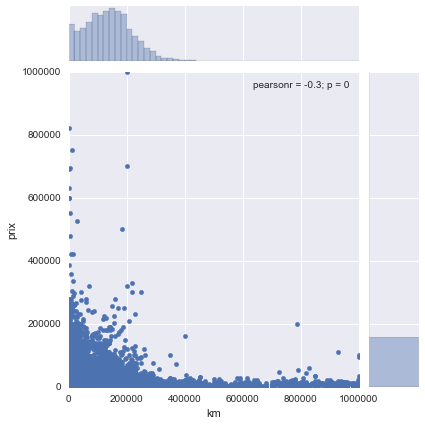

In [97]:
seaborn.jointplot("km","prix",data=occas, kind="scatter", ylim=(0,1e6), xlim=(0,1e6))
plt.show()

In [35]:
occas.describe()

,prix,km,annee
count,5.024680e+05,498527.000000,502476.000000
mean,8.579634e+03,139393.887485,1990.369337
std,1.567185e+04,81763.316443,172.937958
min,1.000000e+00,1.000000,1.000000
25%,2.500000e+03,80000.000000,2002.000000
50%,5.800000e+03,137000.000000,2007.000000
75%,1.150000e+04,191000.000000,2011.000000
max,7.857610e+06,999999.000000,2016.000000


In [36]:
occas[occas.prix > 7e6]

,prix,marque,km,ville,annee,vitesse,modele,carburant,CP,departement
263069,7857610.0,Volkswagen,25000.0,Moyeuvre-Grande 57250,2000,Manuelle,Golf,Diesel,57250,57


In [37]:
occas.sort_values(by="prix", ascending=False, inplace=True)
occas.head()

,prix,marque,km,ville,annee,vitesse,modele,carburant,CP,departement
263069,7857610.0,Volkswagen,25000.0,Moyeuvre-Grande 57250,2000,Manuelle,Golf,Diesel,57250,57
437962,1538999.0,Porsche,2850.0,Montpellier 34000,2015,Automatique,918,Essence,34000,34
52753,1000000.0,Seat,200000.0,Ribécourt-Dreslincourt 60170,2007,Manuelle,Leon,Diesel,60170,60
272247,820000.0,Ferrari,10.0,Colmar 68000,2016,Automatique,458 Speciale,Essence,68000,68
424273,750000.0,Ferrari,11000.0,Brignoles 83170,2010,Automatique,599,Essence,83170,83


In [41]:
occas.dropna(inplace=True)

In [43]:
occas.tail()

,prix,marque,km,ville,annee,vitesse,modele,carburant,CP,departement
33733,1.0,Citroen,10.0,Calvi 20260,1989,Manuelle,Ax,Essence,20260,20
1775,1.0,Suzuki,80000.0,Ully-Saint-Georges 60730,2000,Manuelle,Ignis,Essence,60730,60
3086,1.0,Renault,10000.0,Guignicourt 02190,1989,Manuelle,R4,Essence,02190,02
7707,1.0,Volkswagen,20.0,Trélon 59132,1990,Manuelle,Golf,Diesel,59132,59
22762,1.0,Citroen,240000.0,Roubaix 59100,1998,Manuelle,Xsara,Diesel,59100,59


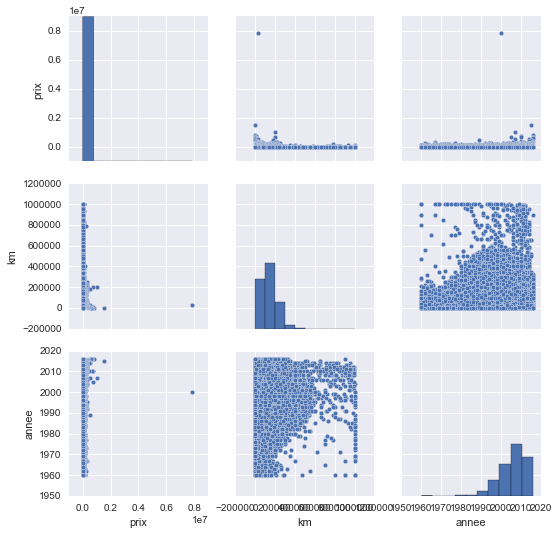

In [48]:
seaborn.pairplot(occas[["prix","km","annee"]])